MSE = 25 
<br>--> square root of MSE = 5.0 
<br>--> test predicitions are within 5.0 of true value

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/carseats.csv')

In [3]:
def set_high(row):
    return 0 if row['Sales'] <= 8 else 1

df = df.assign(High=df.apply(set_high, axis=1))

In [4]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()
df['US_int'] = lbl_encoder.fit_transform(df['US'])
df['Urban_int'] = lbl_encoder.fit_transform(df['Urban'])
df['ShelveLoc_int'] = lbl_encoder.fit_transform(df['ShelveLoc'])

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High,US_int,Urban_int,ShelveLoc_int
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1,1,1,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,1,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1,1,1,2
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1,1,2
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,0,1,0


In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report, accuracy_score

X_cols = [x for x in df.columns if x not in ['Sales', 
                                             'ShelveLoc', 
                                             'Urban', 
                                             'US', 
                                             'High']]
X = df[X_cols]
y = df['High']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

clf = DecisionTreeClassifier(max_depth=3)  
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

-0.050505050505050164
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        55
           1       0.71      0.71      0.71        45

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100

0.74


Accuracy score - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must **exactly match** the corresponding set of labels in y_true.

In [6]:
# find optimal depth of tree using GridSearchCV and CV
from sklearn.model_selection import GridSearchCV, cross_val_score

parameters = {'max_depth':range(1,5)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, iid=False, n_jobs=1, cv=3)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_

y_pred = tree_model.predict(X_test)

print(clf.best_score_, clf.best_params_, end='\n\n')
print(classification_report(y_test, y_pred)) # only for classification
print(accuracy_score(y_test, y_pred)) # only for classification

0.6936143614361437 {'max_depth': 4}

              precision    recall  f1-score   support

           0       0.65      0.82      0.73        55
           1       0.68      0.47      0.55        45

    accuracy                           0.66       100
   macro avg       0.66      0.64      0.64       100
weighted avg       0.66      0.66      0.65       100

0.66


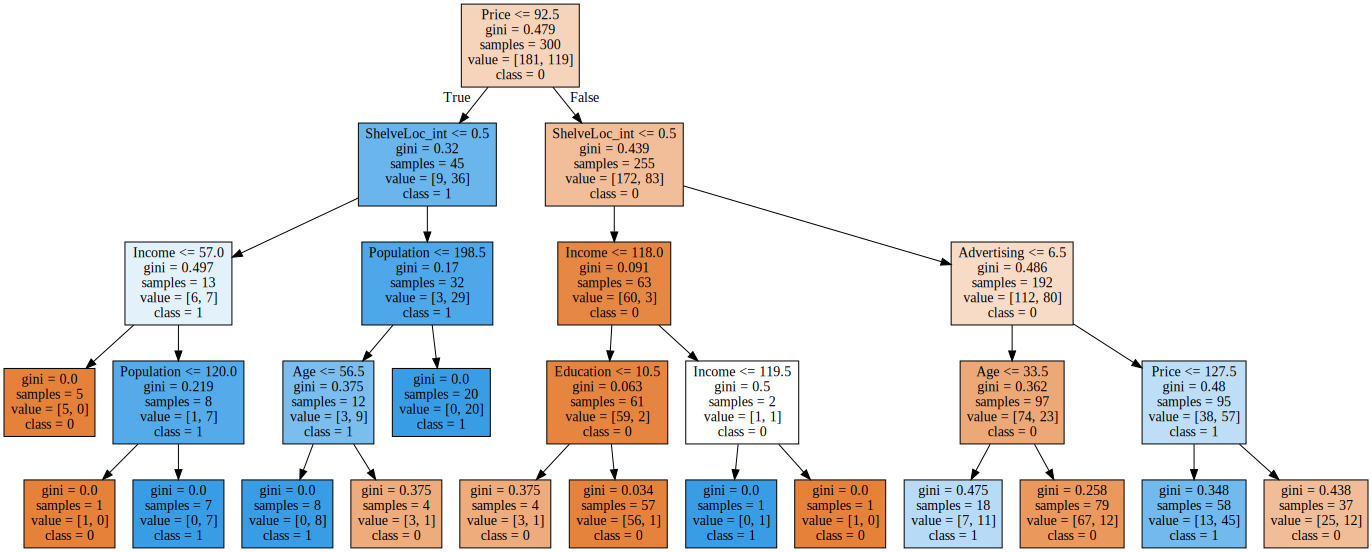

In [7]:
# https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084
# Download in conda and pip
# Download Windows executable from here - https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# Add to path to bin to PATH (EV didn't work)

from graphviz import Source
from IPython.display import SVG
from IPython.display import display

import os
os.environ["PATH"] = r'C:\Program Files (x86)\Graphviz2.38\bin'

graph = Source(tree.export_graphviz(tree_model, 
                                    out_file=None, 
                                    feature_names=X_cols, 
                                    class_names=['0', '1'], 
                                    filled = True))

display(SVG(graph.pipe(format='svg')))

In [8]:
def set_medv(row):
    return 0 if row['medv'] <= 14.6 else 1

df = pd.read_csv('../Data/boston.csv')
df = df.assign(medv_cat=df.apply(set_medv, axis=1))

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medv_cat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

X_cols = [x for x in df.columns if x != 'medv']
X = df[X_cols]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = {'max_depth':range(1,5),
              'min_samples_leaf':range(1,5)}
clf = GridSearchCV(DecisionTreeRegressor(), 
                   parameters, 
                   iid=None, 
                   n_jobs=1, 
                   cv=3)

clf.fit(X_train, y_train)
tree_model = clf.best_estimator_

y_pred = clf.predict(X_test)

print(clf.best_score_, clf.best_params_, end='\n\n')
print(tree_model.score(X_test, y_test))

0.7510714128412368 {'max_depth': 4, 'min_samples_leaf': 4}

0.6110796112399555


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

X_cols = [x for x in df.columns if x not in ['medv', 'medv_cat']]
X = df[X_cols]
y = df['medv_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = {'n_estimators':[100,300,500],
              'max_depth':range(1,5),
              'min_samples_leaf':range(1,5)}
clf = GridSearchCV(RandomForestClassifier(), parameters, iid=None, n_jobs=1, cv=3)

clf.fit(X_train, y_train)
tree_model = clf.best_estimator_

y_pred = clf.predict(X_test)

print(clf.best_score_, clf.best_params_, end='\n\n')
print(tree_model.score(X_test, y_test))

0.9281923714759536 {'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 100}

0.9215686274509803


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

X_cols = [x for x in df.columns if x not in ['medv', 'medv_cat']]
X = df[X_cols]
y = df['medv_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = {'n_estimators':[100,300,500],
              'max_depth':range(1,5),
              'min_samples_leaf':range(1,5)}
clf = GridSearchCV(GradientBoostingClassifier(), parameters, iid=None, n_jobs=1, cv=3)

clf.fit(X_train, y_train)
tree_model = clf.best_estimator_

y_pred = clf.predict(X_test)

print(clf.best_score_, clf.best_params_, end='\n\n')
print(tree_model.score(X_test, y_test))

0.9355813524967754 {'max_depth': 1, 'min_samples_leaf': 2, 'n_estimators': 100}

0.9019607843137255


## Questions

### 7.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('../Data/boston.csv')

X_cols = [x for x in df.columns if x != 'medv']
X = df[X_cols]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

arr_mse = [[] for x in range(3)]
for i, max_depth in enumerate(range(2,5)):
    for min_samples_leaf in range(1, 40):
        clf = DecisionTreeRegressor(min_samples_leaf = min_samples_leaf, max_depth=max_depth)
        clf.fit(X_train, y_train)
        arr_mse[i].append(mean_squared_error(y_test, clf.predict(X_test)))

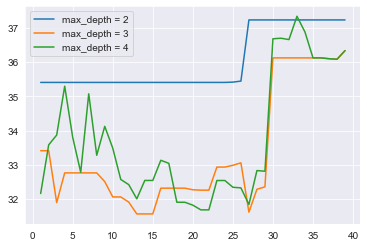

In [14]:
labels = ['max_depth = 2', 'max_depth = 3', 'max_depth = 4']
for label, mse in zip(labels, arr_mse):
    plt.plot(range(1,40), mse, label=label)

plt.legend()

### 8.

In [15]:
df = pd.read_csv('../Data/carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_cols = [x for x in df.columns if x not in ['Sales', 'ShelveLoc', 'Urban', 'US']]
X = df[X_cols]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = {'min_samples_leaf': range(1, 40),
              'max_depth': range(1,6)}

clf = GridSearchCV(DecisionTreeRegressor(), parameters, iid=None, cv=5)
clf.fit(X_train, y_train)

tree_model = clf.best_estimator_

print(clf.best_score_, clf.best_params_, end='\n\n')
print(tree_model.score(X_test, y_test))
print(mean_squared_error(y_test, tree_model.predict(X_test)))

0.2749056353548485 {'max_depth': 5, 'min_samples_leaf': 16}

0.09910564745676143
6.193220397005449


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_cols = [x for x in df.columns if x not in ['Sales', 'ShelveLoc', 'Urban', 'US']]
X = df[X_cols]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = {'min_samples_leaf': [20,30,40],
              'max_depth': range(2,6),
              'n_estimators':[100,300,500]}

clf = GridSearchCV(RandomForestRegressor(), parameters, iid=None, cv=3)
clf.fit(X_train, y_train)

tree_model = clf.best_estimator_

print(clf.best_score_, clf.best_params_, end='\n\n')
print(tree_model.score(X_test, y_test))
print(mean_squared_error(y_test, tree_model.predict(X_test)))
print(tree_model.feature_importances_)

0.29039271079937407 {'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 500}

0.25675714565454966
5.109441292939915
[0.09699837 0.01945013 0.18157737 0.01004914 0.52733225 0.16097903
 0.00361371]


### 9.

In [18]:
df = pd.read_csv('../Data/oj.csv')
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

lbl_encoder = LabelEncoder()
df['Purchase_int'] = lbl_encoder.fit_transform(df['Purchase'])
df['Store7_int'] = lbl_encoder.fit_transform(df['Store7'])

X_cols = [x for x in df.columns if x not in ['Purchase', 'Store7', 'Purchase_int']]
X = df[X_cols]
y = df['Purchase_int']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

parameters = {'n_estimators': [20,30,40,50],
              'max_depth':range(2,6),
              'min_samples_split':range(2,100,2)}

clf = GridSearchCV(RandomForestClassifier(), parameters, iid=None, cv=5)
clf.fit(X_train, y_train)

tree_model = clf.best_estimator_

print(clf.best_score_, clf.best_params_)
print(mean_squared_error(y_test, tree_model.predict(X_test)))
print(tree_model.feature_importances_)

0.8271181830545355 {'max_depth': 5, 'min_samples_split': 28, 'n_estimators': 20}
0.18691588785046728
[0.04084619 0.08247515 0.00188198 0.01379455 0.00960425 0.01020986
 0.003103   0.02139762 0.55273656 0.03238117 0.01813123 0.07120436
 0.01706101 0.00691628 0.02582623 0.04825672 0.04417385]


### 10.

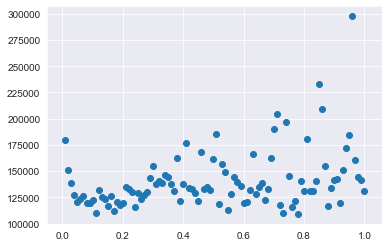

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('../Data/hitters.csv')

lbl_encoder = LabelEncoder()
df['League_Int'] = lbl_encoder.fit_transform(df['League'])
df['Division_Int'] = lbl_encoder.fit_transform(df['Division'])
df['NewLeague_Int'] = lbl_encoder.fit_transform(df['NewLeague'])

X_cols = [x for x in df.columns if x not in ['League', 
                                             'Division', 
                                             'NewLeague', 
                                             'Salary']]
X = df[X_cols]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

mse_arr = []
for learning_rate in np.arange(0.01, 1.01, 0.01):
    clf = GradientBoostingRegressor(learning_rate=learning_rate)
    clf.fit(X_train, y_train)
    mse_arr.append([learning_rate, mean_squared_error(y_test, clf.predict(X_test))])
    
mse_arr = np.array(mse_arr)

plt.scatter(mse_arr[:,0], mse_arr[:, 1])

In [21]:
val = mse_arr[mse_arr[:, 1] == np.min(mse_arr[:, 1])][0]
val[0], val[1]

(0.78, 109164.17769547278)